In [39]:
import csv
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import random as rnd
import datetime 

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn import tree #Look at documentation: http://scikit-learn.org/stable/modules/tree.html
from sklearn import model_selection


from sklearn.model_selection import train_test_split # Helping you divide your datasets to train/test(validation)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
from sklearn.metrics import roc_curve
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'gmplot'

# Load the CSV

In [ ]:
churn_df = pd.read_csv('customer_churn.csv')

# Explore Data at a Summary Level

#### 3333 Records, 23 Features

In [ ]:
churn_df.shape

In [4]:
churn_df.describe()

In [5]:
churn_df.head(2)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


# Rename the columns

In [7]:
churn_df.columns = ['State', 'AccountLength', 'AreaCode', 'Phone', 'IntlPlan',
       'VMailPlan', 'VMailMessage', 'DayMins', 'DayCalls', 'DayCharge',
       'EveMins', 'EveCalls', 'EveCharge', 'NightMins', 'NightCalls',
       'NightCharge', 'IntlMins', 'IntlCalls', 'IntlCharge',
       'CustServCalls', 'Churn']
churn_df.head(2)

,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,EveCalls,EveCharge,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.


Which features are categorical?
- State, Area Code, Phone, Int'l Plan, Churn?

Which features are continuous?
- Account length, Vmail Message, Day Mins, Day Calls, Eve Calls, Eve Charge, Night Mins, Night Calls, Night Charge, Intl Calls, Intl Charge, CustServCalls

Which features are mixed data types?
- None

Which features contain blank, null or empty values?
- None

# Determine the Total Customer Churn

In [21]:
total_churn = churn_df['churn'].sum()
percent_churn = total_churn / 3333
print("# of Customers Churned:", total_churn)
print("% of Customers Churned:", percent_churn*100)

# of Customers Churned: 483
% of Customers Churned: 14.491449144914492


# Convert categorical variables to numerical: 'Churn?', 'IntlPlan', 'VMailPlan'

In [22]:
churn = churn_df['Churn'].map({'False.':0, 'True.':1})
churn_df['churn'] = churn
churn_df.head(2)

,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn,churn,StateCategory
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.7,1,False.,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.7,1,False.,0,1


In [23]:
churn_df['IntlPlan'].map({0:"yes", 1:'no'})
churn_df['VMailPlan'].map({0:"yes", 1:'no'})
churn_df['churn'] = churn
churn_df.head(2)

,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn,churn,StateCategory
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.7,1,False.,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.7,1,False.,0,1


In [24]:
churn_df.head(1)

,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn,churn,StateCategory
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.7,1,False.,0,0


# Create 'StateCategory' as an Index to 'State' so that we can graph Churn by State

In [25]:
churn_df['StateCategory'] = churn_df['State'].factorize()[0]
churn_df.head(2)

,State,AccountLength,AreaCode,Phone,IntlPlan,VMailPlan,VMailMessage,DayMins,DayCalls,DayCharge,...,NightMins,NightCalls,NightCharge,IntlMins,IntlCalls,IntlCharge,CustServCalls,Churn,churn,StateCategory
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.7,1,False.,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.7,1,False.,0,1


### Doesn't appear to be a correlation between state and # of people who churned

In [26]:
state_df= churn_df[['State','churn']].groupby(['State'], as_index=False).sum()
state_df.sort_values(by=['churn'], ascending=False)

,State,churn
31,NJ,18
43,TX,18
20,MD,17
22,MI,16
23,MN,15
34,NY,15
26,MT,14
33,NV,14
25,MS,14
40,SC,14


Text(0,0.5,'# of Churn Customers')

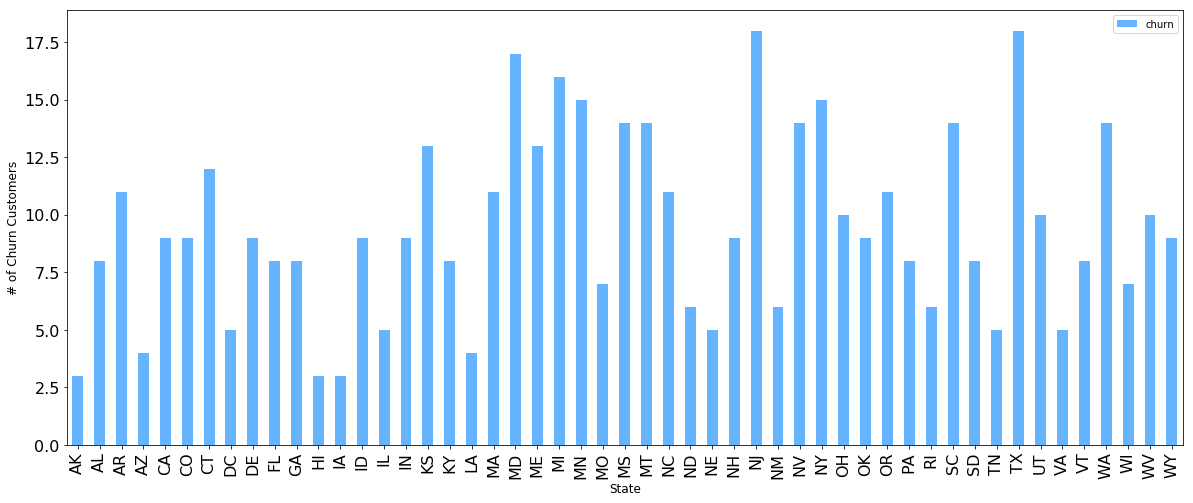

In [27]:
state_df.plot.bar(x='State',y = 'churn',figsize= (20,8), fontsize = 16, color='#66b3ff')
plt.xlabel('State', fontsize=12)
plt.ylabel('# of Churn Customers', fontsize=12)

In [38]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = churn_df['State'],
        z = churn_df['churn'].astype(float),
        locationmode = 'USA-states',
#         text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Churn Customers")
        ) ]

layout = dict(
        title = 'Churn Customers by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

# Customer Service Analysis

### Count of Customer Service Calls and Churn Customers

Text(0,0.5,'# of Churn Customers')

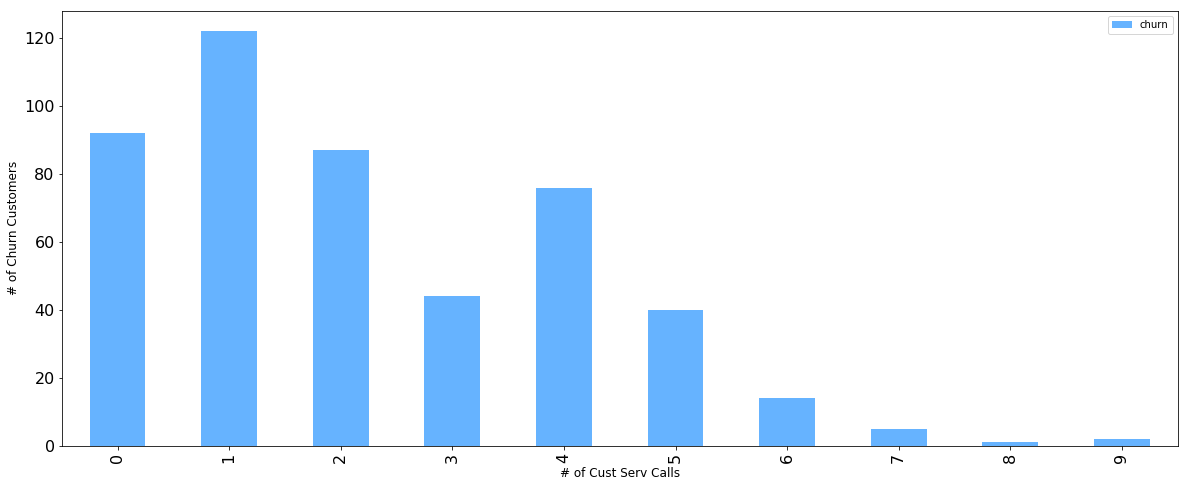

In [28]:
custserv_df= churn_df[['CustServCalls','churn']].groupby(['CustServCalls'], as_index=False).sum()
custserv_df.plot.bar(x = 'CustServCalls', y ='churn',figsize=(20,8), fontsize = 16, color='#66b3ff')
plt.xlabel('# of Cust Serv Calls', fontsize=12)
plt.ylabel('# of Churn Customers', fontsize=12)

In [29]:
custserv_df.sort_values(by=['churn'], ascending=False)

,CustServCalls,churn
1,1,122
0,0,92
2,2,87
4,4,76
3,3,44
5,5,40
6,6,14
7,7,5
9,9,2
8,8,1


### Add a column 'Churn_pct' which calculates the % of churned customers 

Text(0,0.5,'% of Churn Customers')

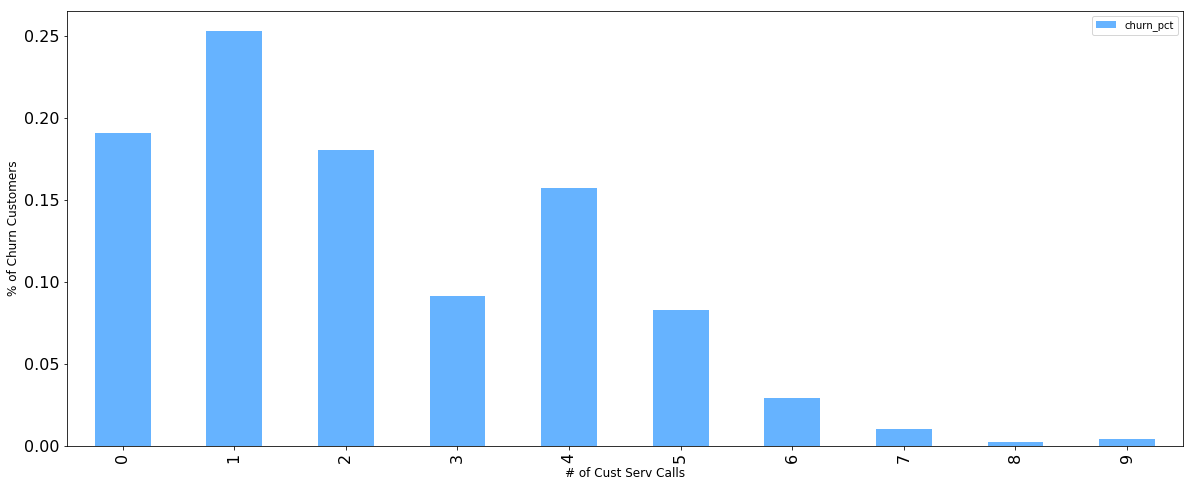

In [30]:
custserv_df['churn_pct'] = custserv_df['churn'] / total_churn
custserv_df.plot.bar(x = 'CustServCalls', y ='churn_pct',figsize=(20,8), fontsize = 16, color='#66b3ff')
plt.xlabel('# of Cust Serv Calls', fontsize=12)
plt.ylabel('% of Churn Customers', fontsize=12)

### 19% of churn customers do not log a support call
### 25% of churn customer log 1 support call
### 18% of churn customer log 2 support calls
### 81% of churn customers log a support call

# Voicemail Plans Analysis

In [18]:
voicemail_df= churn_df[['VMailPlan','churn']].groupby(['VMailPlan'], as_index=False).sum()
voicemail_df['churn_pct'] = voicemail_df['churn'] / total_churn
ax = voicemail_df.plot.pie(x = 'VMailPlan', y ='churn_pct',figsize=(20,8), fontsize = 16, colors = ['#ff9999','#66b3ff'], labels=['Cust w/o VM', 'Cust w/ VM'],autopct='%1.1f%%', startangle=90)

NameError: name 'total_churn' is not defined

In [19]:
voicemail_df.head(2)

,VMailPlan,churn
0,no,403
1,yes,80


# International Plan counts

In [ ]:
IntlPlan_df= churn_df[['IntlPlan','churn']].groupby(['IntlPlan'], as_index=False).sum()
IntlPlan_df['churn_pct'] = IntlPlan_df['churn'] / total_churn
IntlPlan_df.plot.pie(x = 'IntlPlan', y ='churn_pct',figsize=(20,8), fontsize = 16, colors = ['#ff9999','#66b3ff'], labels=['Cust w/o Intl Plan', 'Cust w/ Intl Plan'],autopct='%1.1f%%', startangle=90)

Next step is to investigate minutes usage. Daytime charges have the highest max and median charges

# Day Charge counts

### Sort DayCharges by Churn customer count

In [ ]:
daycharge_df = churn_df[['DayCharge','churn']].groupby(['DayCharge'], as_index=False).sum()
daycharge_df.sort_values(by=['churn'], ascending=False).head()

### Sort Day Charges by the # of Customers churned

In [ ]:
zero_churn = daycharge_df.loc[daycharge_df['churn'] == 0]
zero_df = zero_churn[zero_churn.columns.drop('churn')]
zero_df.columns = ['No Churn']
zero_df.head(2)

In [ ]:
one_churn = daycharge_df.loc[daycharge_df['churn'] == 1]
one_df = one_churn[one_churn.columns.drop('churn')]
one_df.columns = ['1 Churned Cust']
one_df.head(2)

In [ ]:
two_churn = daycharge_df.loc[daycharge_df['churn'] == 2]
two_df = two_churn[two_churn.columns.drop('churn')]
two_df.columns = ['2 Churned Cust']
two_df.head(2)

In [ ]:
churn_concat = pd.concat([one_df, two_df, zero_df])
churn_concat.head()
churn_concat.plot(kind='box', figsize = (20,8), fontsize = 16)
plt.xlabel('# of Churned Customers', fontsize=12)
plt.ylabel('Daytime Charges', fontsize=12)

### Churned customers have higher Day Charges than No Churn customers

# Classification

We will now select the columns for traning our Churn classifier

In [ ]:
churn_df.columns

# Select Columns to Use and Drop Columns that Won't be Used in Modelling

In [ ]:
churn_df_class = churn_df[['CustServCalls','IntlPlan','DayCharge','DayMins',
                          'DayCalls','IntlMins','IntlCalls','IntlCharge','VMailPlan',
                         'VMailMessage','StateCategory','AccountLength',
                          'EveCalls', 'EveCharge', 'NightMins', 'NightCalls', 'NightCharge',
                          'churn']]

churn_df_class  = churn_df.drop(["Phone", "AreaCode", "State","StateCategory","Churn"], axis=1)


In [ ]:
churn_df_class.head(2)

### Initializing classifiers and divide the to train/test(validation)


In [ ]:
#Initialize Various Classifiers
clf = GaussianNB()
clf_tree = tree.DecisionTreeClassifier()
clf_KNN = KNeighborsClassifier()
clf_SVM = svm.SVC()
clf_randomforest = RandomForestClassifier()

# Split-out validation dataset
array = churn_df_class.values
X = array[:,0:17] # Features/Independent Variables
Y = array[:,17] # Response/Class Variable

#Scaling the features to have the same magnitude 
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Use 10% of data as the test set
validation_size = 0.10

seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

#X_train_scale = scaler.fit_transform(X_train)
#X_validation_scale = scaler.fit_transform(X_validation)

#X_train_transform = scaler.transform(X_train_scale)
#X_validation_transform = scaler.transform(X_validation_scale)

train_size = len(X_train)
val_size = len(X_validation)
print(val_size)
print(train_size)

## Performance Evaluation and Model Selection Using Cross Validation

In [ ]:
# Test options and evaluation metric
scoring = 'accuracy'

#Model Performance
#setting performance parameters
kfold = model_selection.KFold(n_splits=10, random_state=seed)

#calling the cross validation function
cv_results_nb = model_selection.cross_val_score(GaussianNB(),X_train, Y_train, cv=kfold, scoring=scoring)
cv_results_tree = model_selection.cross_val_score(tree.DecisionTreeClassifier(),X_train, Y_train, cv=kfold, scoring=scoring)
cv_results_knn = model_selection.cross_val_score(KNeighborsClassifier(),X_train, Y_train, cv=kfold, scoring=scoring)
cv_results_svm = model_selection.cross_val_score(svm.SVC(),X_train, Y_train, cv=kfold, scoring=scoring)
cv_results_random = model_selection.cross_val_score(RandomForestClassifier(),X_train, Y_train, cv=kfold, scoring=scoring)

#displaying the mean and standard deviation of the prediction
msg = "%s: %f (%f)" % ('NB accuracy', cv_results_nb.mean(), cv_results_nb.std())
msg2 = "%s: %f (%f)" % ('Tree accuracy', cv_results_tree.mean(), cv_results_tree.std())
msg3 = "%s: %f (%f)" % ('KNN accuracy', cv_results_knn.mean(), cv_results_knn.std())
msg4 = "%s: %f (%f)" % ('SVM accuracy', cv_results_svm.mean(), cv_results_svm.std())
msg5 = "%s: %f (%f)" % ('Random Forest accuracy', cv_results_random.mean(), cv_results_random.std())

print(msg)
print(msg2)
print(msg3)
print(msg4)
print(msg5)


### Setting up classifier parameters, evaluation metric, and train and test (validate) using the classifier that gives us the highest accuracy

In [ ]:
#Fitting the training set on RandomForest
clf_randomforest.fit(X_train,Y_train)

#Predicting for the Test(Validation) Set
pred_randomforest = clf_randomforest.predict(X_validation)
probs = clf_randomforest.predict_proba(X_validation)

In [ ]:
report = classification_report(Y_validation,pred_randomforest)
print(report)

In [ ]:
# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(Y_validation, probs[:,1])
plt.figure(figsize=(15,10))
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

get_ipython().magic('matplotlib inline')
# confusion_matrix = pd.DataFrame(
#     confusion_matrix(Y_validation, pred_randomforest), 
#     columns=["Predicted False", "Predicted True"], 
#     index=["Actual False", "Actual True"]
# )
display(confusion_matrix)